# Predicting Airline Passenger Satisfaction

### Link to the Kaggle Dataset: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction/data?select=satisfaction.xlsx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Objectives 

We are interested in figuring out what impacts airline passenger satisfaction and predicting it based on various factors. 

# Data Selection

This dataset is found on Kaggle (link available at the beginning of the notebook).  

The dataset is about predicting US Airline Passenger Satisfaction. The source of the dataset comes from the US Airline Passenger Satisfaction Survey.

The US Airline Passenger Satisfaction dataset consists of 129880 records and 24 fields: 

- `id`: Unique identifier for each passenger
- `Satisfaction_v2`: Level of passenger satisfaction
- `Age`: Age of the passenger
- `Gender`: Gender of the passenger
- `Customer Type`: Loyalty status of the passenger
- `Type of Travel`: Purpose of the flight
- `Class`: Seat class of the flight
- `Flight Distance`: Distance of the flight
- `Inflight wifi service`: Satisfaction level of the inflight wifi service, represented by a number between 0 (Not Applicable) and 5
- `Ease of Online booking`: How easy to book online
- `Online boarding`: Satisfaction level of online boarding
- `Online support`: satisfaction level of online support
- `Inflight entertainment`: Satisfaction level of inflight entertainment
- `Cleanliness`: Satisfaction level of the overall cleanliness of the plane
- `Food and drink`: Satisfaction level of food and drink
- `Seat comfort`: Satisfaction level of seat comfort
- `On-board service`: Satisfaction level of on-board service
- `Leg room service`: Satisfaction level of leg room service
- `Departure/Arrival time convenient`: Satisfaction level of departure and arrival time convenience
- `Baggage handling`: Satisfaction level of baggage handling
- `Gate location`: Satisfaction level of gate location
- `Check-in service`: Satisfaction level of check-in service
- `Departure Delay in Minutes`: Minutes delayed in departure
- `Arrival Delay in Minutes`: Minutes delayed in arrival



In [2]:
df = pd.read_excel("/Users/emoho/Downloads/coding_project/satisfaction.xlsx")
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

The dataset contains 129880 rows of passenger information and 24 informative columns. 

# Data Preparation

The first step of data preparation is to check for null values. We will go through each column and see if there are null values.

In [4]:
df.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

There are null values in the 'Arrival Delay in Minutes'. Seeing that flights that were delayed have a non-zero value, we will assume that the passengers with null values in that specific column experienced no delay. The next step is to replace those null values with 0 to indicate no delay.



In [5]:
#Remove spaces in the column names
df.columns = df.columns.str.replace(' ', '_').str.lower()

#Fill in the null values with 0 in the 'Arrival Delay In Minutes' column
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(0)

#Rename 'satisfaction_v2'to 'satisfaction'
df.rename(columns={'satisfaction_v2': 'satisfaction'}, inplace=True)

#Change the Satisfaction values to either satisfied or dissatisfied
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 'dissatisfied'})
print(df.head())

       id satisfaction  gender   customer_type  age   type_of_travel  \
0   11112    satisfied  Female  Loyal Customer   65  Personal Travel   
1  110278    satisfied    Male  Loyal Customer   47  Personal Travel   
2  103199    satisfied  Female  Loyal Customer   15  Personal Travel   
3   47462    satisfied  Female  Loyal Customer   60  Personal Travel   
4  120011    satisfied  Female  Loyal Customer   70  Personal Travel   

      class  flight_distance  seat_comfort  departure/arrival_time_convenient  \
0       Eco              265             0                                  0   
1  Business             2464             0                                  0   
2       Eco             2138             0                                  0   
3       Eco              623             0                                  0   
4       Eco              354             0                                  0   

   ...  online_support  ease_of_online_booking  on-board_service  \
0  ...      

In [6]:
# Checking if the changes were actually made
df.columns

Index(['id', 'satisfaction', 'gender', 'customer_type', 'age',
       'type_of_travel', 'class', 'flight_distance', 'seat_comfort',
       'departure/arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

## Check For Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicated rows, so we will move on to the next step of data preparation, 'encoding'.

## Encoding
The 'satisfaction' variable is currently a categorical variable. To prepare the data for classification, we need to convert it to a numerical variable. 1 will represent 'Satisfied' whereas 0 will represent 'Dissatisfied'.

In [8]:
df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'dissatisfied': 0})

# Data Visualization

The data is now ready for analysis and visualizations.

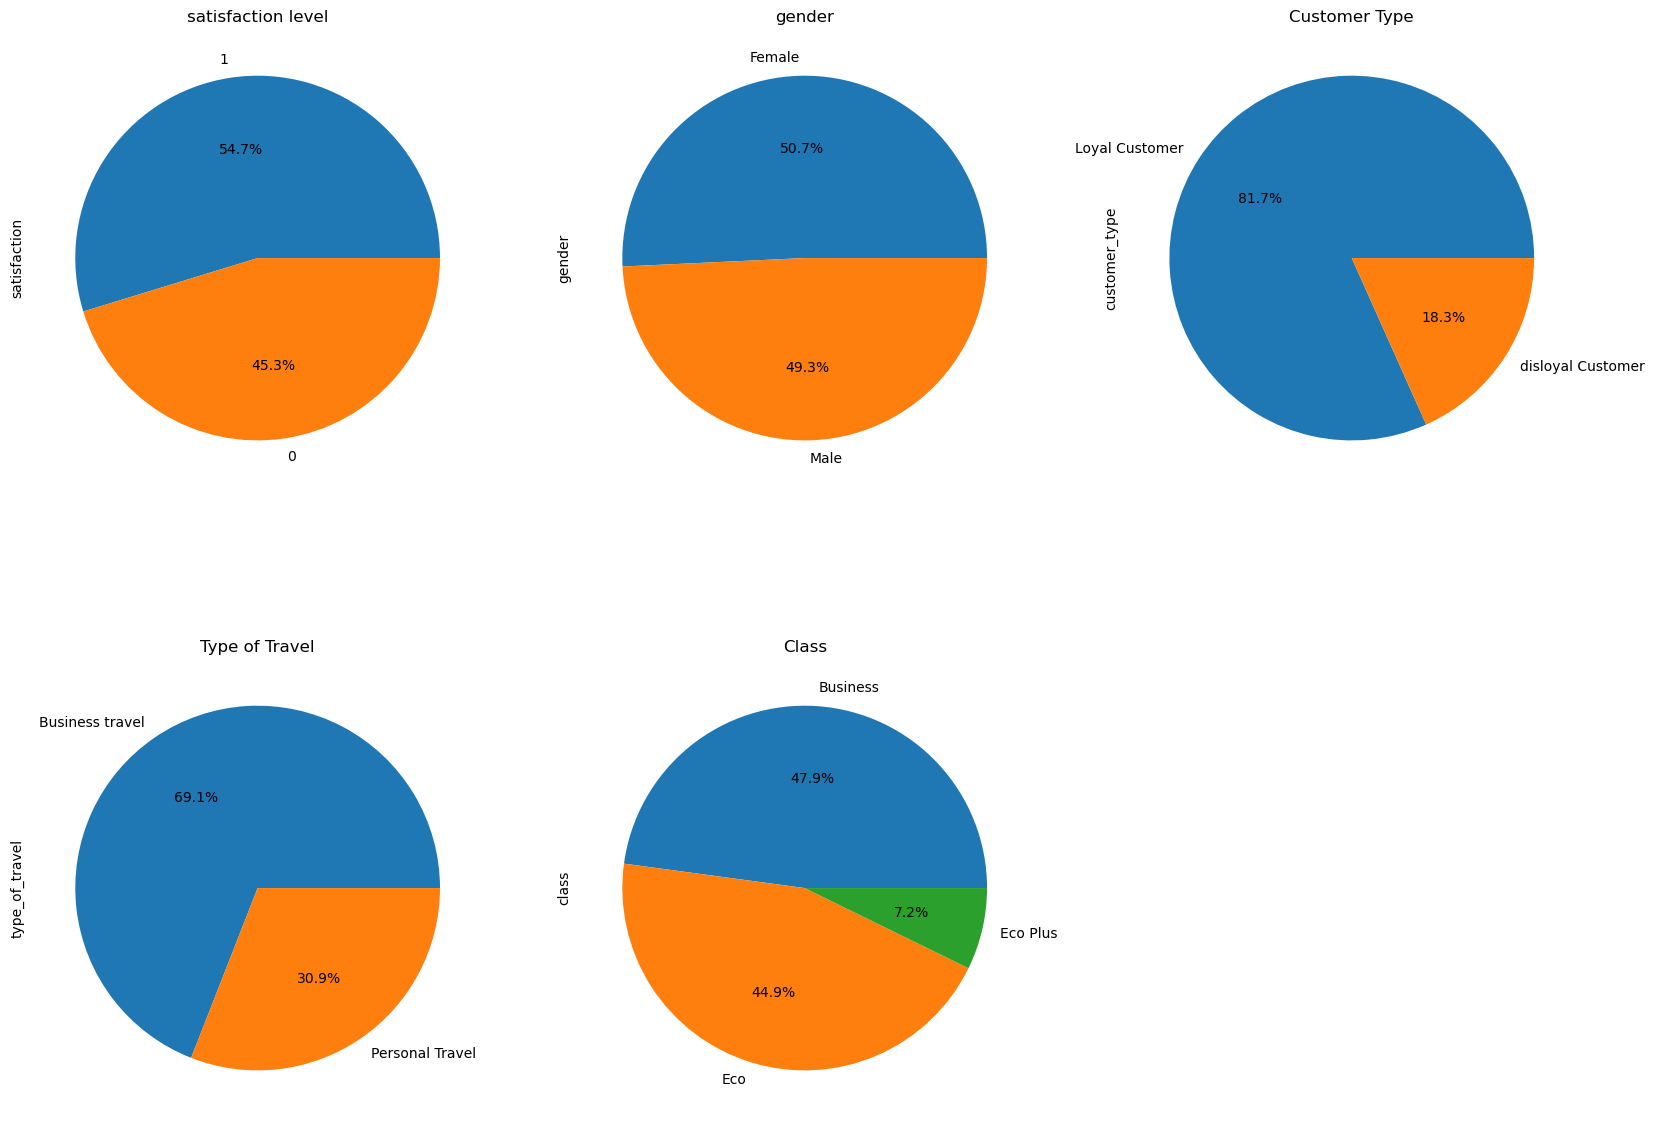

In [9]:
# Pie charts of the satisfaction level, gender, and customer type, type of travel, class, and flight
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
df['satisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('satisfaction level')
plt.subplot(2, 3, 2)
df["gender"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('gender')
plt.subplot(2, 3, 3)
df["customer_type"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Customer Type')
plt.subplot(2, 3, 4)
df["type_of_travel"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Type of Travel')
plt.subplot(2, 3, 5)
df["class"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class')
plt.show()

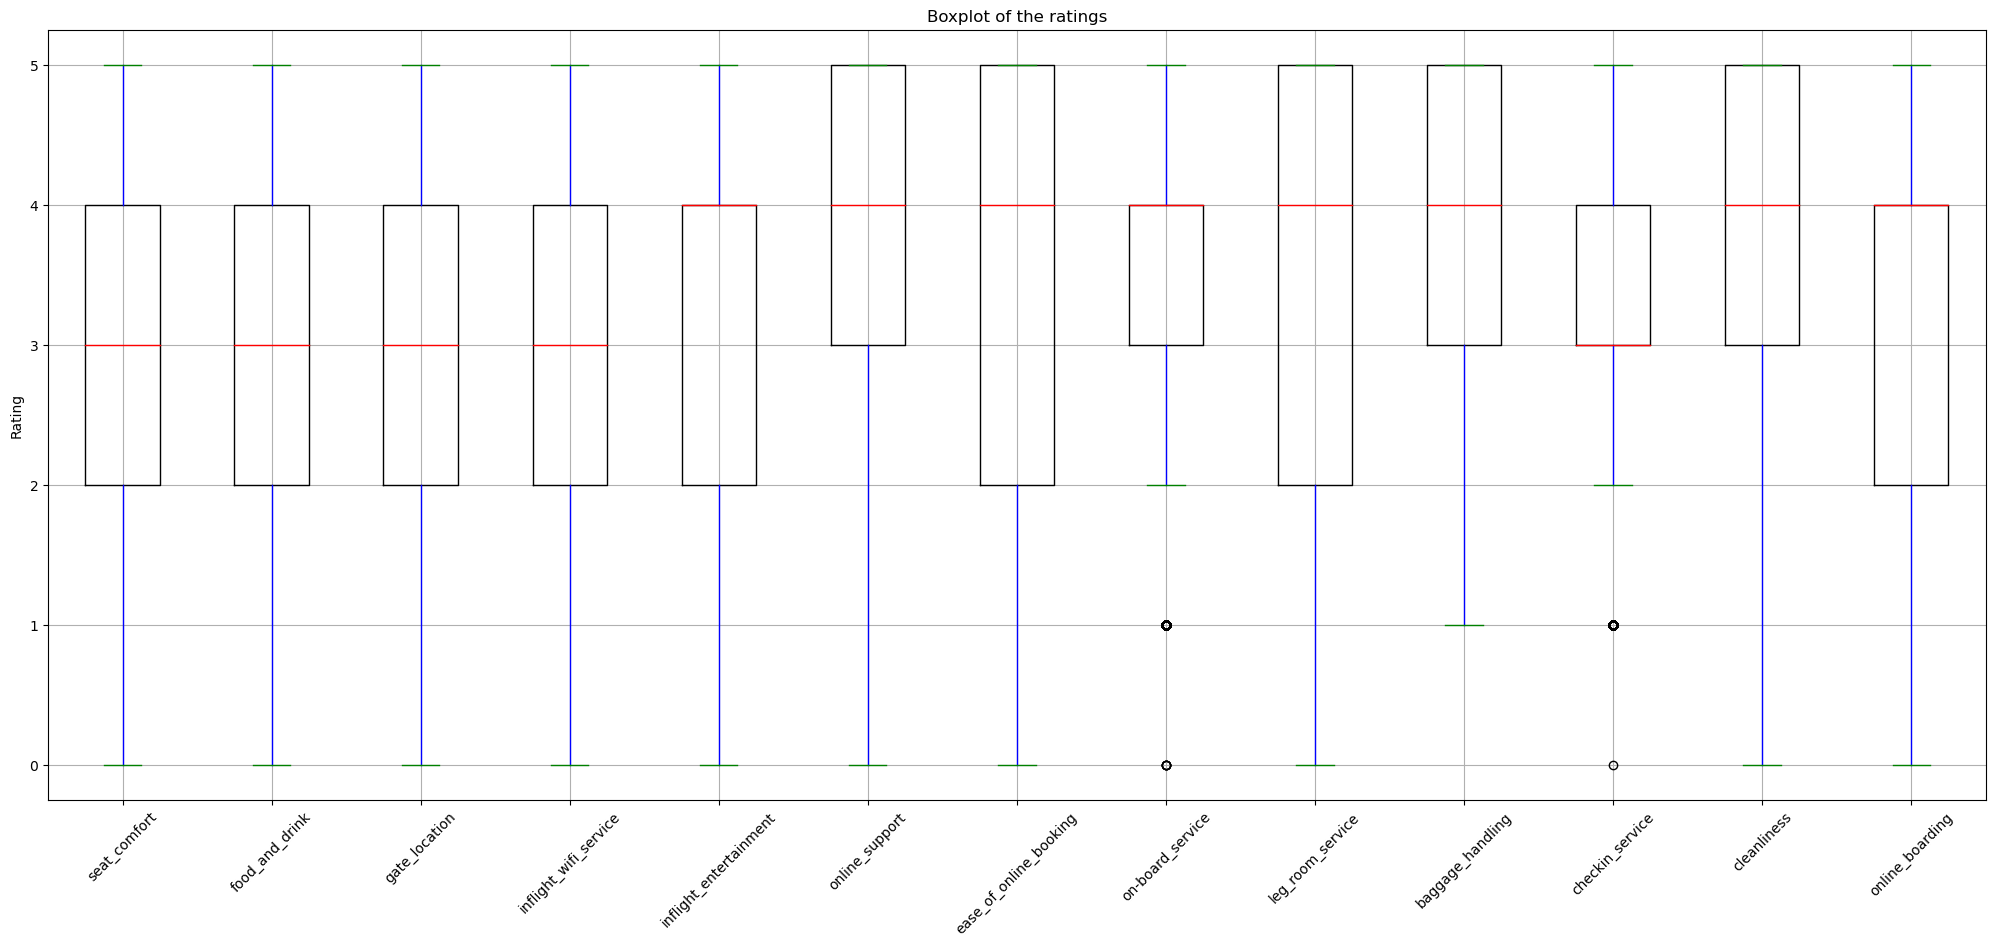

In [10]:
# boxplots of the ratings like checkin service, cleanliness, online boarding, etc.
df.boxplot(column=["seat_comfort",
                   'food_and_drink', 
                   'gate_location',
                   'inflight_wifi_service', 
                   'inflight_entertainment', 
                   'online_support',
                   'ease_of_online_booking',
                   'on-board_service', 
                   'leg_room_service',
                   'baggage_handling', 
                   'checkin_service', 
                   'cleanliness', 
                   'online_boarding'], 
           figsize=(25,10), 
           rot=45,boxprops=dict(color="black"), 
           whiskerprops=dict(color='blue'), 
           capprops=dict(color='green'), 
           medianprops=dict(color='red'))

plt.ylabel("Rating")
plt.title('Boxplot of the ratings')
plt.show()

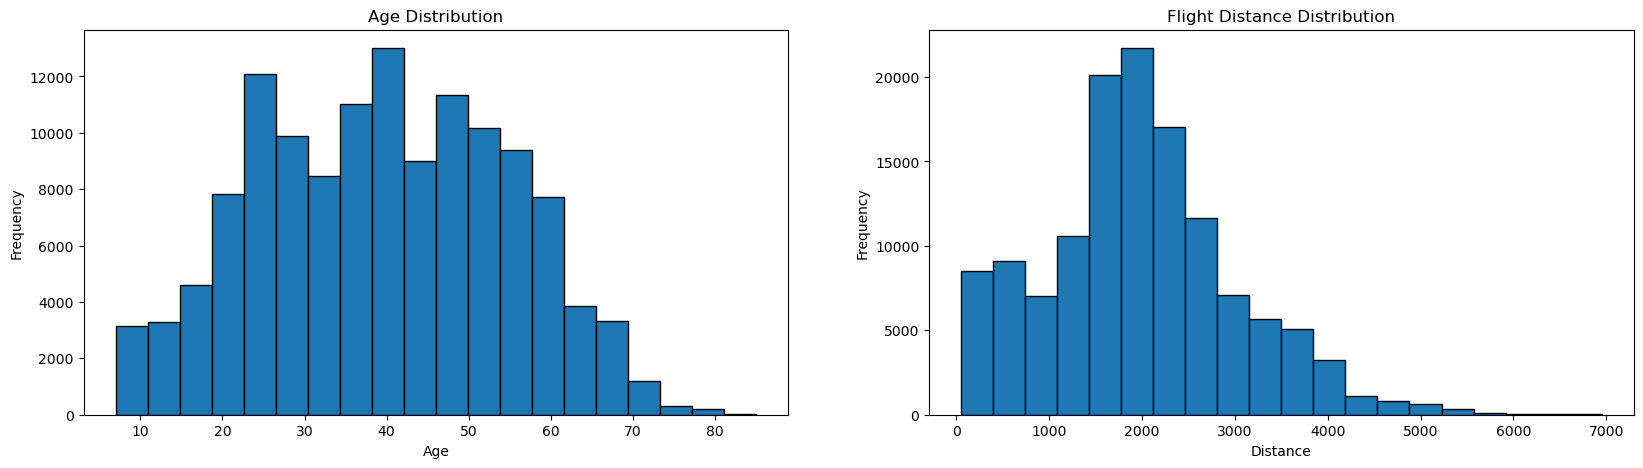

In [11]:
# Histograms

# Age distribution
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
df['age'].plot.hist(bins=20,  edgecolor='black')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.subplot(1, 2, 2)

# Flight Distance
df['flight_distance'].plot.hist(bins=20,  edgecolor='black')
plt.title('Flight Distance Distribution')
plt.xlabel("Distance")
plt.show()

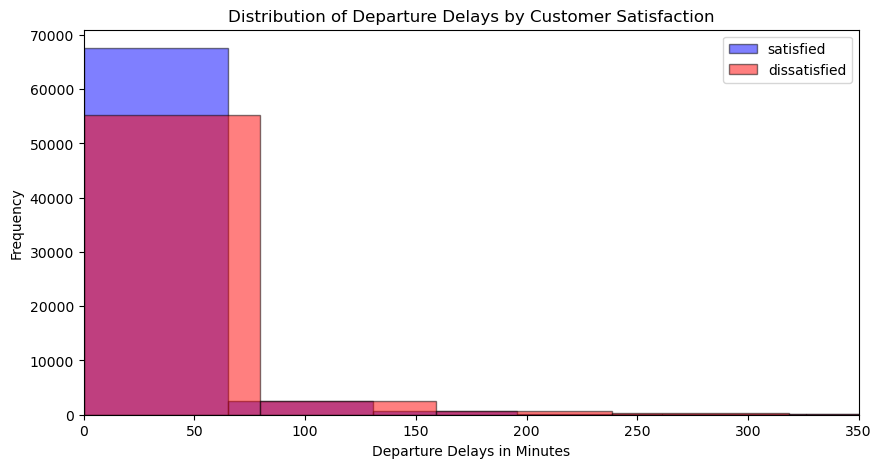

In [12]:
# show the departure delay distribution of different satisfaction level
plt.figure(figsize=(10, 5))
df.loc[df['satisfaction'] == 1, 'departure_delay_in_minutes'].plot.hist(bins=20, alpha=0.5, color='blue', edgecolor='black')
df.loc[df['satisfaction'] == 0, 'departure_delay_in_minutes'].plot.hist(bins=20, alpha=0.5, color='red', edgecolor='black')
plt.title('Distribution of Departure Delays by Customer Satisfaction')
plt.legend(['satisfied', 'dissatisfied'])
plt.xlabel("Departure Delays in Minutes")
#shorten the x-axis
plt.xlim(0,350)
plt.show()

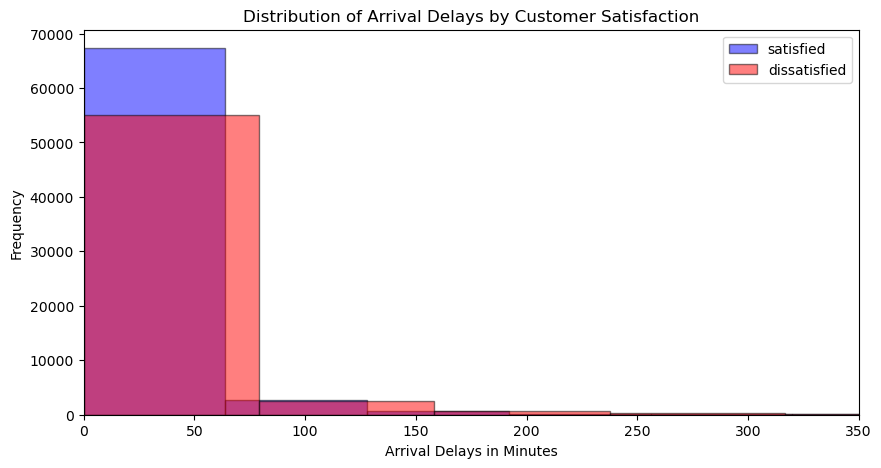

In [13]:
# show the arrival delay distribution of different satisfaction level
plt.figure(figsize=(10, 5))
df.loc[df['satisfaction'] == 1, 'arrival_delay_in_minutes'].plot.hist(bins=20, alpha=0.5, color='blue', edgecolor='black')
df.loc[df['satisfaction'] == 0, 'arrival_delay_in_minutes'].plot.hist(bins=20, alpha=0.5, color='red', edgecolor='black')
plt.title('Distribution of Arrival Delays by Customer Satisfaction')
plt.legend(['satisfied', 'dissatisfied'])
plt.xlabel("Arrival Delays in Minutes")
plt.xlim(0,350)
plt.show()

Based on the two histograms, it appears that dissatisfied passengers experience longer delays during both arrival and departure.

# Statistical Analysis

We are interested in calculating the average delay in minutes for departure and arrival.

In [14]:
# Average Departure Delay in Minutes
avg_depart_delay = df['departure_delay_in_minutes'].mean()
avg_depart_delay

14.713712657838004

In [15]:
# Average Arrival Delay in Minutes
avg_arrival_delay = df['arrival_delay_in_minutes'].mean()
avg_arrival_delay

15.045465044656606

The average delays for departure and arrival are similar, with the arrival delay being 1 minute longer. Next, we will calculate the mean of age, flight distance, departure delay, and arrival for satisfied and dissatisfed passengers.

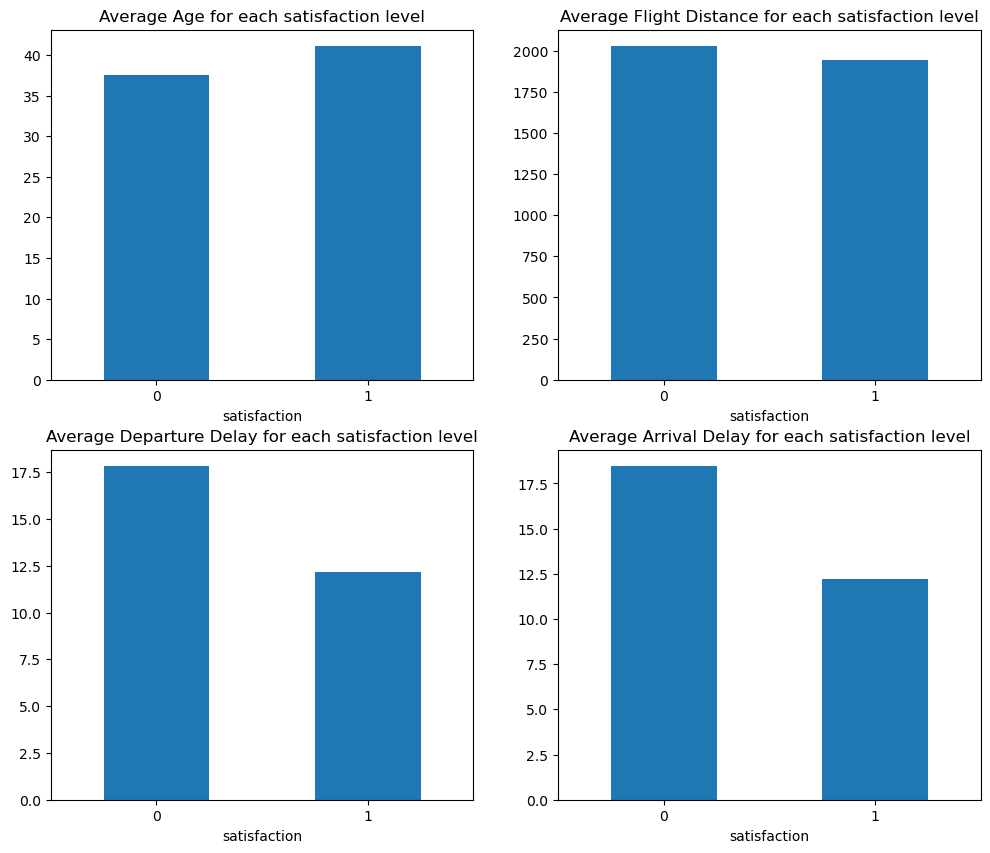

In [16]:
# calculate and display average age for each satisfaction level
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
df.groupby('satisfaction')['age'].mean().plot.bar(rot=0,)
plt.title('Average Age for each satisfaction level')
plt.subplot(2, 2, 2)

# calculate and display average flight distance for each satisfaction level
df.groupby('satisfaction')['flight_distance'].mean().plot.bar(rot=0)
plt.title('Average Flight Distance for each satisfaction level')
plt.subplot(2, 2, 3)

# calculate and display average departure delay for each satisfaction level
df.groupby('satisfaction')['departure_delay_in_minutes'].mean().plot.bar(rot=0)
plt.title('Average Departure Delay for each satisfaction level')
plt.subplot(2, 2, 4)

# calculate and display average arrival delay for each satisfaction level
df.groupby('satisfaction')['arrival_delay_in_minutes'].mean().plot.bar(rot=0)
plt.title('Average Arrival Delay for each satisfaction level')
plt.show()

Based on the bar graphs, we can see that people were dissatisfied when delays were long, which makes sense. Regarding flight distance, there is not a significant difference in flight distance between satisfied and dissatisfied passengers. We also noticed that satisfied passengers tend to be older than dissatisfied passengers.

For further analysis, we wanted to calculate the average score based on multiple variables. 

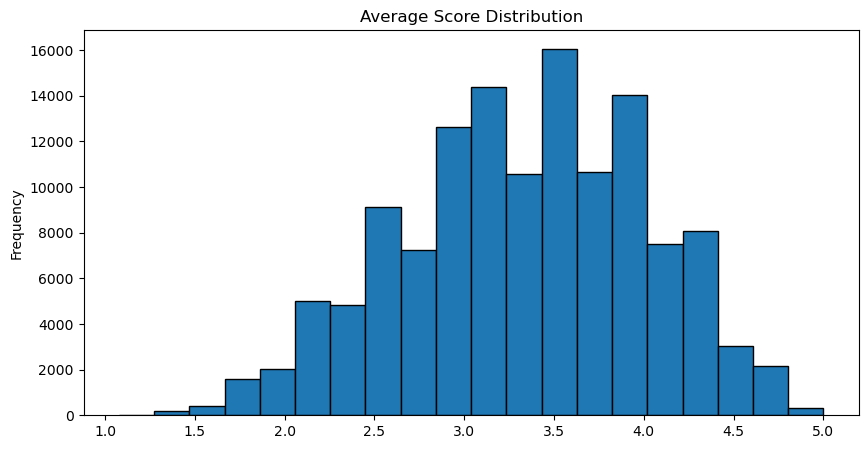

In [17]:
# get the average score for each row
score_columns = ['seat_comfort', 'food_and_drink', 'gate_location',
         'inflight_wifi_service', 'inflight_entertainment', 'online_support',
         'ease_of_online_booking', 'on-board_service', 'leg_room_service',
         'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding']
df['average_score'] = df[score_columns].mean(axis=1)

# show the distribution of the average score
plt.figure(figsize=(10, 5))
df['average_score'].plot.hist(bins=20, edgecolor='black')
plt.title('Average Score Distribution')
plt.show()

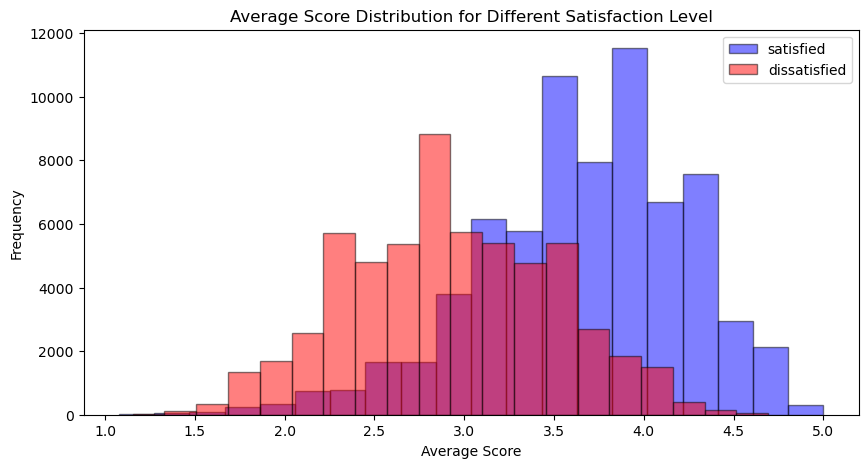

In [18]:
# show the score distribution of different satisfaction level
plt.figure(figsize=(10, 5))
df.loc[df['satisfaction'] == 1, 'average_score'].plot.hist(bins=20, alpha=0.5, color='blue', edgecolor='black')
df.loc[df['satisfaction'] == 0, 'average_score'].plot.hist(bins=20, alpha=0.5, color='red', edgecolor='black')
plt.title('Average Score Distribution for Different Satisfaction Level')
plt.legend(['satisfied', 'dissatisfied'])
plt.xlabel("Average Score")
plt.show()

Based on the above graph, we can see that the average score is higher for the satisfied customers than the dissatisfied customers, which makes sense.

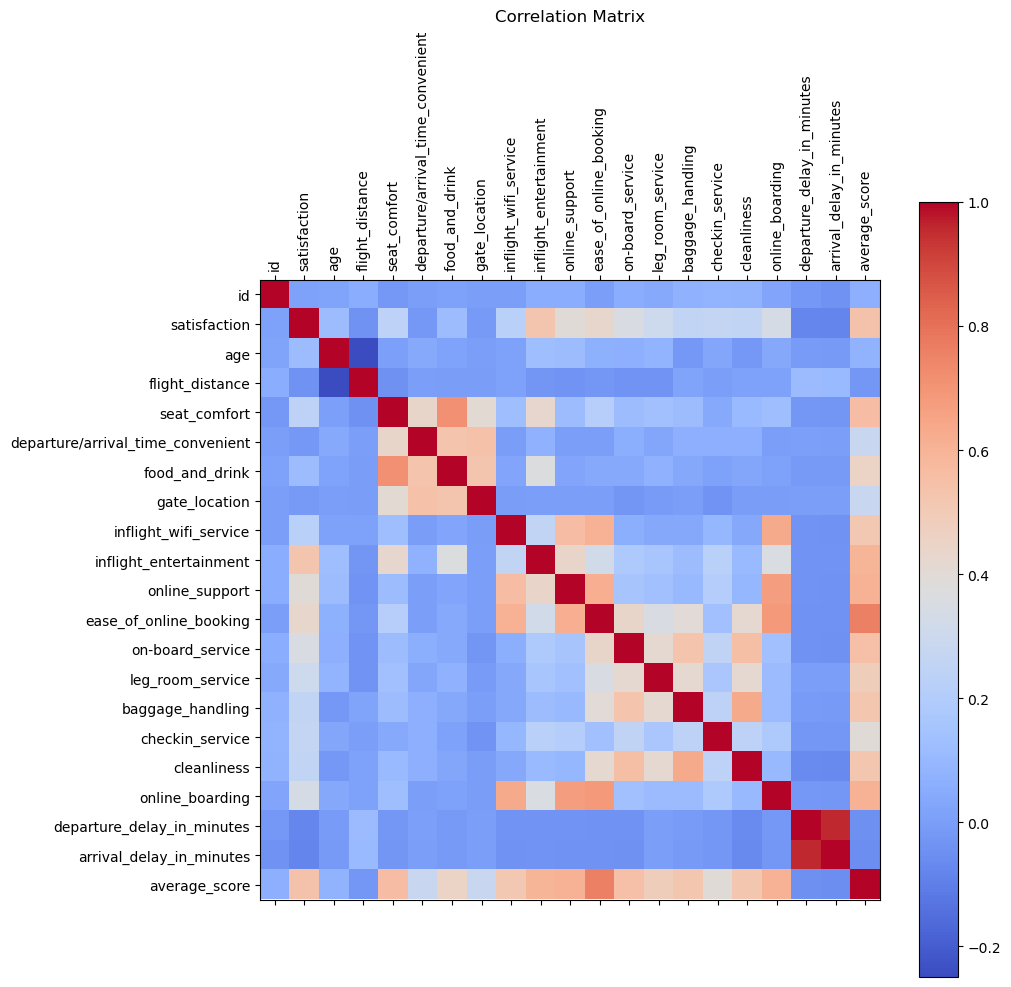

In [19]:

# show the heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
numeric_columns = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_columns].corr()
# corr = df.corr()
plt.matshow(corr, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

Based on the heatmap, we can see that 'inflight_entertainment' and 'ease_of_online_booking' are the most correlated with satisfaction. What's surprising is that the 'departure delay in minutes' and 'arrival delay in minutes' have the smallest correlation with satisfaction.

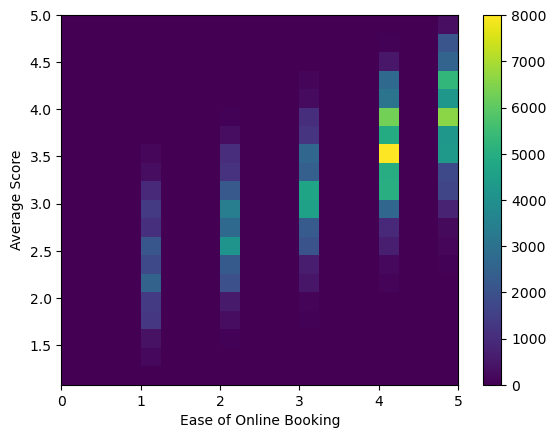

In [20]:
# The average score is highly correlated with the 'ease of online booking' 
plt.hist2d(df['ease_of_online_booking'], df['average_score'], bins=20)
plt.xlabel('Ease of Online Booking')
plt.ylabel('Average Score')
plt.colorbar()
plt.show()

From the map before, we can tell from the final row that showcases the correlation between average satisfaction score and different standards. We discovered the strong positive correlation between ease of online booking and average satisfactionn, hence we intend to visualize the correlation through the heatmap above. The x-axis is the ease of online booking, ranging from 1-5. The y-axis is the average satisfaction score corresponding to the x-axis, which the map shows that the average score tends to be higher when online booking becomes easier. The light colors represent higher frequency of customers making the vote, visualizing how the majority of customers rated the online booking service between 4-5, with the average score being 3.5.

# Classification

Now that we have performed basic statistic analysis, we will predict satisfaction using classification. Seeing that 'ease of online booking' and 'in flight entertainment' have the highest correlation, we thought it would be interesting to use those two variables to predict satisfaction. The selected model is a KNeighborsClassifier, which makes classifications based on neighboring data points. The default number of data points is 5, which means the model takes 5 neighboring data points to make predictions for a point.

In [21]:
X1 = df[['ease_of_online_booking',
         'inflight_entertainment'
        ]]
Y1 = df['satisfaction']

#Train test data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size = .2, random_state = 42)

#create the kNN model 
knn_model = KNeighborsClassifier(n_neighbors=5)

#Fit the model using the train data
knn_model.fit(x_train,y_train)

#Store the predictions for the train and test sets
knn_pred_train = knn_model.predict(x_train)
knn_pred_test = knn_model.predict(x_test)

#Calculate the accuracy score of training and test predictions
print('Training accuracy:', accuracy_score(y_train,knn_pred_train))
print("Test accuracy:", accuracy_score(y_test,knn_pred_test))

Training accuracy: 0.8009316291961811
Test accuracy: 0.8011241145672929


Using just those variables, the accuracies of the knn model were decent, roughly 80%. However, we wanted to include other variables and see if we can increase the training and test accuracies.

In [22]:
X1 = df[['seat_comfort',
         'food_and_drink',
         'online_support',
         'inflight_entertainment',
         'ease_of_online_booking',
         'on-board_service',
         'leg_room_service',
         'baggage_handling',
         'checkin_service',
         'cleanliness',
         'online_boarding',
         'departure_delay_in_minutes',
         'arrival_delay_in_minutes'
        ]]
Y1 = df['satisfaction']

#Train test data with 20% being used for testing
x_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size = .2, random_state = 42)

#create the kNN model 
knn_model = KNeighborsClassifier(n_neighbors=5)

#Fit the model using the train data
knn_model.fit(x_train,y_train)

#Store the predictions for the train and test sets
knn_pred_train = knn_model.predict(x_train)
knn_pred_test = knn_model.predict(x_test)

#Calculate the accuracy score of training and test predictions
print('Training accuracy:', accuracy_score(y_train,knn_pred_train))
print("Test accuracy:", accuracy_score(y_test,knn_pred_test))

Training accuracy: 0.9128137511549123
Test accuracy: 0.8711887896519864


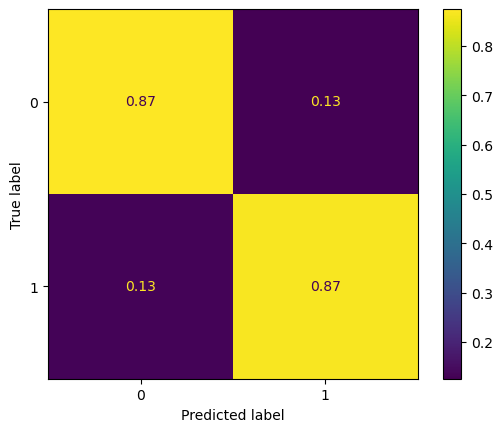

In [23]:
# Create a confusion matrix
cm = confusion_matrix(y_test,knn_pred_test,normalize='true')
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot()

# Results

After including more variables in the model, we noticed a higher training and test accuracy, which means that the knn model has gotten better at predicting satisfaction based on those variables. We saw an increase of the test accuracy from 80% to 87%, a sign of improvement. Now, we will try to optimize the model by changing the n_neighbors, the parameter that determines how many neighboring points will be used to make a decision for a new data point. The default n_neighbors is 5. We will calculate the test accuracy with a n_neighbors ranging from 1 to 20.

In [24]:
#finding the optimal n_neighbors

acc = {}
for n in range(1,21):
    optimized_knn = KNeighborsClassifier(n_neighbors=n)
    
    #Fit the model using the train data
    optimized_knn.fit(x_train,y_train)

    #Store the predictions for the test set
    opt_knn_pred_test = optimized_knn.predict(x_test)
    
    test_acc = accuracy_score(y_test,opt_knn_pred_test)
    
    acc[n] = test_acc
    
acc
    

{1: 0.8563289190021558,
 2: 0.8445103172158915,
 3: 0.8695719125346474,
 4: 0.861603018170619,
 5: 0.8711887896519864,
 6: 0.8663381582999692,
 7: 0.8727671696951032,
 8: 0.8701493686479828,
 9: 0.8735756082537727,
 10: 0.8707653218355405,
 11: 0.872536187249769,
 12: 0.8706883276870958,
 13: 0.873383122882661,
 14: 0.8713042808746535,
 15: 0.8719587311364336,
 16: 0.8704573452417617,
 17: 0.8711887896519864,
 18: 0.8690329534955343,
 19: 0.8692254388666462,
 20: 0.8672235910070835}

In [25]:
max_n = max(acc, key=acc.get)
print("A model with a n_neighbors equal to " + str(max_n) + " has the highest test accuracy of " + str(acc[max_n]) + ".")

A model with a n_neighbors equal to 9 has the highest test accuracy of 0.8735756082537727.


The n_neighbors that resulted in the highest test accuracy is 9. It has a test accuracy of 0.8735756082537727. This is the best that the knn model can do. For future purposes, it is a good idea to test other models like decision tree.